<a href="https://colab.research.google.com/github/michhottinger/CS-Data-Science-Build-Week-1/blob/master/CS_Build_Week1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:

#heart data:
#https://www.kaggle.com/ronitf/heart-disease-uci
#kmeans via "simple implementation"
import numpy as np
from numpy.linalg import norm


class Kmeans:
    '''Implementing Kmeans algorithm.'''

    def __init__(self, n_clusters, max_iter=100, random_state=123):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state

    def initialize_centroids(self, X):
        np.random.RandomState(self.random_state)
        random_idx = np.random.permutation(X.shape[0])
        centroids = X[random_idx[:self.n_clusters]]
        return centroids

    def compute_centroids(self, X, labels):
        centroids = np.zeros((self.n_clusters, X.shape[1]))
        for k in range(self.n_clusters):
            centroids[k, :] = np.mean(X[labels == k, :], axis=0)
        return centroids

    def compute_distance(self, X, centroids):
        distance = np.zeros((X.shape[0], self.n_clusters))
        for k in range(self.n_clusters):
            row_norm = norm(X - centroids[k, :], axis=1)
            distance[:, k] = np.square(row_norm)
        return distance

    def find_closest_cluster(self, distance):#Returns the indices of the 
                                               #minimum values along an axis
        return np.argmin(distance, axis=1)

    def compute_sse(self, X, labels, centroids):#sum of squares Error calc
        distance = np.zeros(X.shape[0])
        for k in range(self.n_clusters):
            distance[labels == k] = norm(X[labels == k] - centroids[k], axis=1)
        return np.sum(np.square(distance))
    
    def fit(self, X):
        self.centroids = self.initialize_centroids(X)
        for i in range(self.max_iter):
            old_centroids = self.centroids
            distance = self.compute_distance(X, old_centroids)
            self.labels = self.find_closest_cluster(distance)
            self.centroids = self.compute_centroids(X, self.labels)
            if np.all(old_centroids == self.centroids):#Test whether all array 
                                 #elements along a given axis evaluate to True
                                 #this is looking for convergence
                break
        self.error = self.compute_sse(X, self.labels, self.centroids)
    
    def predict(self, X):
        old_centroids = self.centroids#to define old within function
        distance = self.compute_distance(X, old_centroids)
        return self.find_closest_cluster(distance)

In [22]:
#plot data
# Modules
import matplotlib.pyplot as plt
from matplotlib.image import imread
import pandas as pd
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

%matplotlib inline
sns.set_context('notebook')
plt.style.use('fivethirtyeight')
from warnings import filterwarnings
filterwarnings('ignore')


In [23]:
# Import the data
df = pd.read_csv('https://raw.githubusercontent.com/michhottinger/CS-Data-Science-Build-Week-1/master/datasets_33180_43520_heart.csv')
df.head(5)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [24]:
#dealing with categorical data. One hot encoding would work here too

a = pd.get_dummies(df['cp'], prefix = "cp")
b = pd.get_dummies(df['thal'], prefix = "thal")
c = pd.get_dummies(df['slope'], prefix = "slope")
d = pd.get_dummies(df['sex'], prefix = "sex")
e = pd.get_dummies(df['restecg'], prefix = "restecg")

frames = [df, a, b, c, d, e]
df = pd.concat(frames, axis = 1)



df_copy = df.drop(columns = ['cp', 'thal', 'slope', 'sex', 'restecg'])
df_copy.head()

,age,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,cp_0,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2,sex_0,sex_1,restecg_0,restecg_1,restecg_2
0,63,145,233,1,150,0,2.3,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0
1,37,130,250,0,187,0,3.5,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0
2,41,130,204,0,172,0,1.4,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,1,0,0
3,56,120,236,0,178,0,0.8,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0
4,57,120,354,0,163,1,0.6,0,1,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0


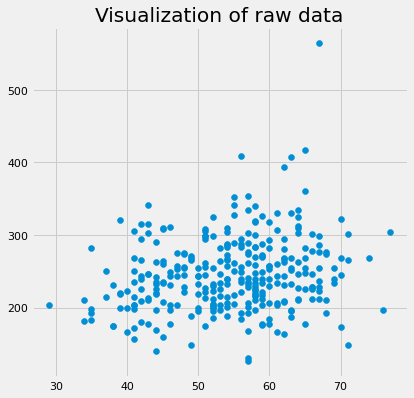

In [25]:
# Plot the data
plt.figure(figsize=(6, 6))
features = ['age',	'sex',	'trestbps',	'chol',	'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'ca', 'target', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'thal_0', 'thal_1', 'thal_2', 'thal_3', 'slope_0',	'slope_1', 'slope_2',	'cp_0',	'cp_1',	'cp_2',	'cp_3',	'thal_0',	'thal_1',	'thal_2',	'thal_3', 'slope_0', 'slope_1', 'slope_2']
X = df_copy['age']
y = df_copy['chol']
plt.scatter(X, y)
plt.xlabel('')
plt.ylabel('')
plt.title('Visualization of raw data');

In [26]:
data = df_copy[['age', 'chol']]
data.shape

(303, 2)

In [27]:
# Standardize the data
X_std = StandardScaler().fit_transform(data)

# Run local implementation of kmeans
km = Kmeans(n_clusters=3, max_iter=100, random_state = 42)
km.fit(X_std)
centroids = km.centroids
# labels is exquivalent to calling fit(x) then predict
labels_ = km.predict(X_std)
labels_

array([0, 1, 1, 0, 2, 0, 2, 1, 1, 0, 0, 1, 1, 0, 2, 1, 2, 0, 1, 0, 0, 1,
       1, 0, 1, 2, 0, 1, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 2, 2, 1, 1, 2,
       1, 2, 1, 1, 1, 1, 1, 2, 0, 1, 0, 1, 1, 1, 1, 2, 0, 2, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 2, 2, 2, 1, 2, 0, 1,
       0, 0, 1, 0, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 0, 1, 1, 0, 0, 1, 1, 1,
       2, 0, 2, 1, 2, 1, 1, 0, 1, 1, 2, 2, 1, 2, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 2, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 2,
       1, 0, 1, 1, 0, 0, 0, 2, 1, 1, 1, 2, 0, 0, 0, 1, 0, 1, 2, 0, 0, 1,
       0, 2, 1, 2, 2, 0, 2, 0, 1, 1, 0, 2, 1, 1, 2, 0, 0, 2, 0, 2, 1, 0,
       0, 0, 1, 0, 2, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 2, 0, 2, 0, 2, 0, 1,
       2, 0, 2, 2, 0, 0, 2, 1, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 1, 0, 0,
       0, 2, 0, 1, 2, 0, 2, 0, 2, 1, 2, 2, 2, 2, 0, 1, 0, 1, 0, 1, 2, 0,
       0, 0, 2, 1, 2, 2, 1, 0, 0, 0, 1, 1, 0, 0, 2, 0, 2, 1, 0, 1, 0, 2,
       0, 0, 2, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 1, 0,

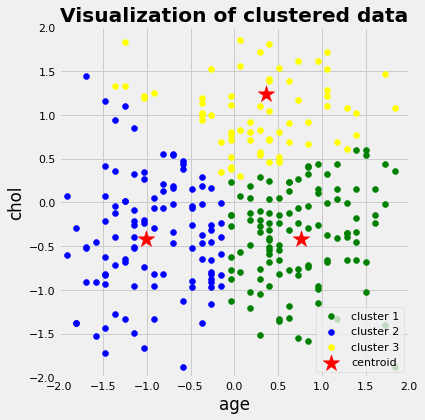

In [28]:

# Plot the clustered data
fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(X_std[labels_ == 0, 0], X_std[labels_ == 0, 1],
            c='green', label='cluster 1')
plt.scatter(X_std[labels_ == 1, 0], X_std[labels_ == 1, 1],
            c='blue', label='cluster 2')
plt.scatter(X_std[labels_ == 2, 0], X_std[labels_ == 2, 1],
            c='yellow', label='cluster 3')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300,
            c='r', label='centroid')
plt.legend()
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel('age')
plt.ylabel('chol')
plt.title('Visualization of clustered data', fontweight='bold')
ax.set_aspect('equal');

In [29]:
data['cluster'] = labels_
data.head(5)

,age,chol,cluster
0,63,233,0
1,37,250,1
2,41,204,1
3,56,236,0
4,57,354,2


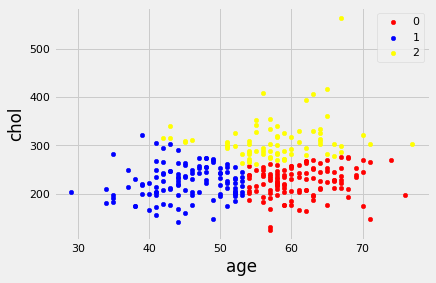

In [30]:
#uses lables from clusters to see on data
fig, ax = plt.subplots()
colors = {0:'red', 1:'blue', 2:'yellow'}
grouped = data.groupby('cluster')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='age', y='chol', label=key, color=colors[key])
plt.show()

Next, we'll show that different initializations of centroids may yield to different results. I'll use 9 different random_state to change the initialization of the centroids and plot the results. The title of each plot will be the sum of squared distance of each initialization.


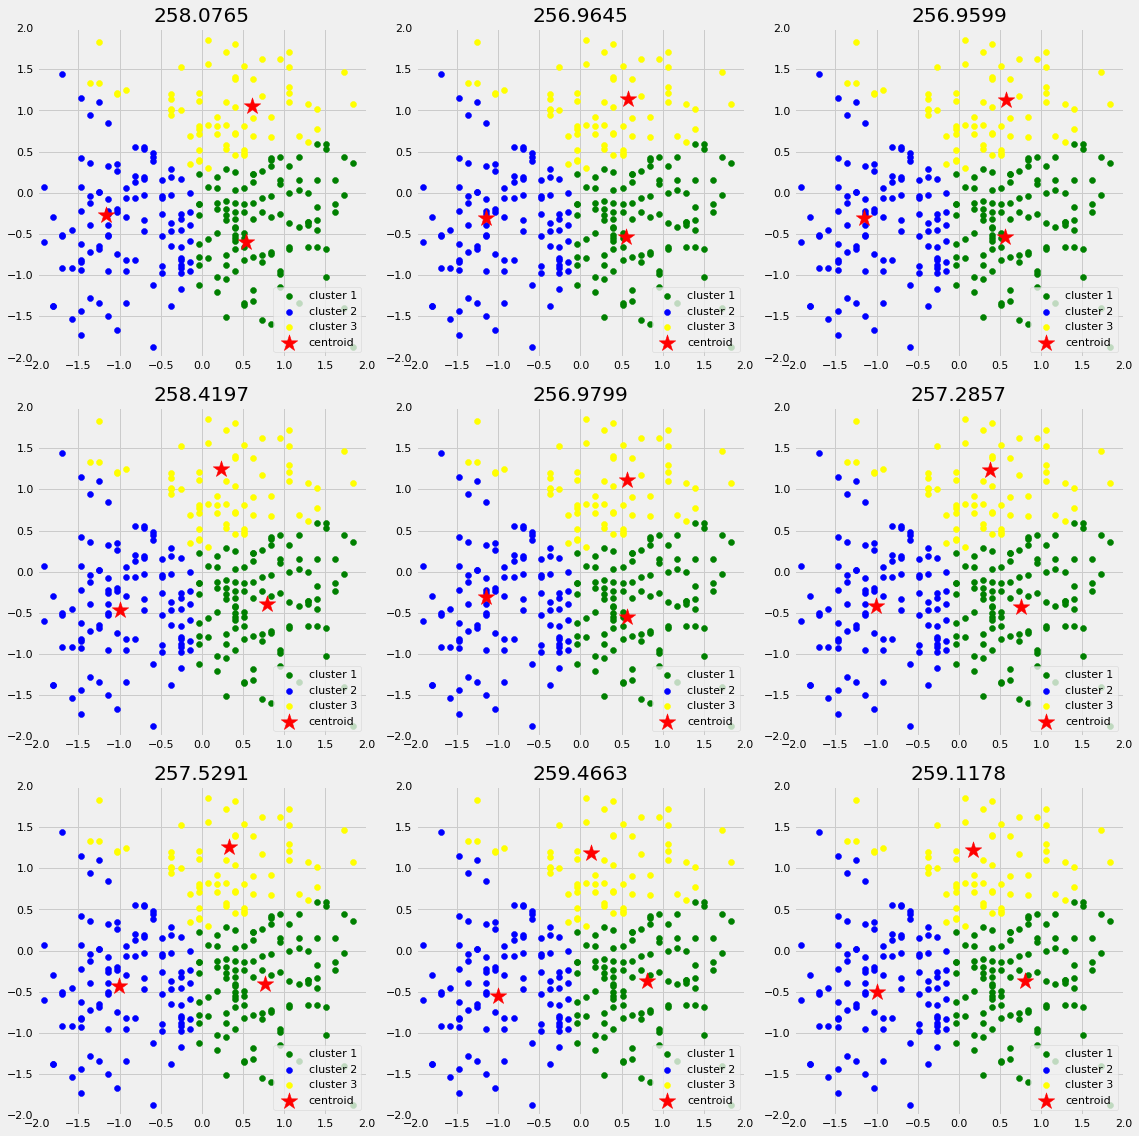

In [31]:
#diff initializations == diff results
n_iter = 9
fig, ax = plt.subplots(3, 3, figsize=(16, 16))
ax = np.ravel(ax)
centers = []
for i in range(n_iter):
    # Run local implementation of kmeans
    km = Kmeans(n_clusters=3,
                max_iter=10,
                random_state=np.random.randint(0, 1000, size=1))
    km.fit(X_std)
    centroids = km.centroids
    centers.append(centroids)
    ax[i].scatter(X_std[labels_ == 0, 0], X_std[labels_ == 0, 1],
                  c='green', label='cluster 1')
    ax[i].scatter(X_std[labels_ == 1, 0], X_std[labels_ == 1, 1],
                  c='blue', label='cluster 2')
    ax[i].scatter(X_std[labels_ == 2, 0], X_std[labels_ == 2, 1],
                  c='yellow', label='cluster 3')
    ax[i].scatter(centroids[:, 0], centroids[:, 1],
                  c='r', marker='*', s=300, label='centroid')
    ax[i].set_xlim([-2, 2])
    ax[i].set_ylim([-2, 2])
    ax[i].legend(loc='lower right')
    ax[i].set_title(f'{km.error:.4f}')
    ax[i].set_aspect('equal')
plt.tight_layout();

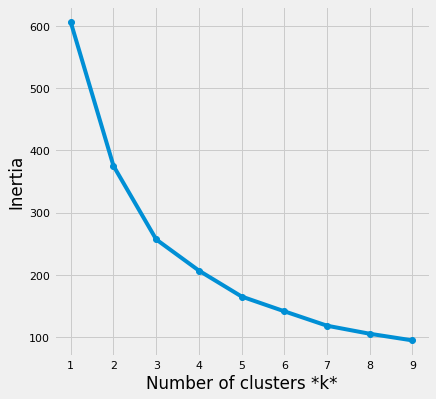

In [32]:
#elbow method:
# Run the Kmeans algorithm and get the index of data points clusters
sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X_std)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Inertia');